In [42]:
# We are importing all the required libraries 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [43]:
# Now,we are reading our csv dataset.

dataset = pd.read_csv("ms_admission.csv")

In [44]:
dataset

,gre,gpa,work_experience,admitted
0,380,3.61,3,0
1,660,3.67,3,1
2,800,4.00,1,1
3,640,3.19,4,1
4,520,2.93,4,0
...,...,...,...,...
395,620,4.00,2,0
396,560,3.04,3,0
397,460,2.63,2,0
398,700,3.65,2,0


In [45]:
# We are now printing all the columns avaiable in the dataset.

print(dataset.columns)

Index(['gre', 'gpa', 'work_experience', 'admitted'], dtype='object')


In [46]:
# We assigned the independent variables to X and dependent varibale to y.
X = dataset[['gre', 'gpa','work_experience']]
y = dataset['admitted']

In [47]:
# We are printing to top 5 elements using the head().
print(X.head())

   gre   gpa  work_experience
0  380  3.61                3
1  660  3.67                3
2  800  4.00                1
3  640  3.19                4
4  520  2.93                4


In [48]:
print(y.head())

0    0
1    1
2    1
3    1
4    0
Name: admitted, dtype: int64


In [49]:
# We are now dividing the whole dataset into taining and test. For the test we choose 25% and 75% dataset 
# for training

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
#create prediction model
model = LogisticRegression()

In [51]:
#fit model
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Now, we are passing the test data to the model for the prediction.
y_predictions = model.predict(X_test)

In [53]:
print(y_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


In [54]:
print("prediction: {} ".format(accuracy_score(y_test,y_predictions) * 100))
print(classification_report(y_test, y_predictions))

prediction: 69.0 
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        65
           1       0.67      0.23      0.34        35

    accuracy                           0.69       100
   macro avg       0.68      0.58      0.57       100
weighted avg       0.68      0.69      0.64       100



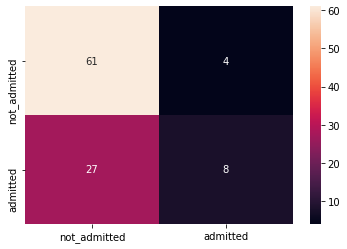

<Figure size 216x216 with 0 Axes>

In [55]:
#plotting confusion matrix on heatmap
confusion_matrix = confusion_matrix(y_test, y_predictions)
sns.heatmap(confusion_matrix, annot=True, xticklabels=['not_admitted','admitted'], yticklabels=['not_admitted','admitted'])
# sns.heatmap(confusion_matrix, annot=True)

plt.figure(figsize=(3,3))
plt.show()

In [56]:
# We printing the top 5 elements of the X_test (independent variables) data.
X_test.head()

,gre,gpa,work_experience
132,580,3.40,2
309,440,2.98,3
341,560,2.65,3
196,660,3.07,3
246,680,3.34,2


In [57]:
# We printing the top 5 elements of the y_test (dependent variable) data.
y_test.head()

132    0
309    0
341    1
196    0
246    0
Name: admitted, dtype: int64

In [58]:
# We just printing the top 5 results
# We found that from the above truth y_test only one person should be admitted and else not because 
# only 341 index value has 1 value (admitted) and else has values 0 (not admitted).

# And in the prediction results we got all results same except the 3rd item which should be 1 (admitted).
# So our predictions is woring fine.
y_predictions[:5]

array([0, 0, 0, 0, 0])

## Now, we are going to check the prediction for the new dataset. We are going to create a new dataframe and we will test new dataframe on the trained model.

In [59]:
new_testData = {'gre': [595,735,682,613,715],
                  'gpa': [2.1,4,3.4,2.4,3],
                  'work_experience': [4,4,5,2,4]
                  }

In [60]:
test_data = pd.DataFrame(new_testData,columns= ['gre', 'gpa','work_experience'])

In [61]:
test_data

,gre,gpa,work_experience
0,595,2.1,4
1,735,4.0,4
2,682,3.4,5
3,613,2.4,2
4,715,3.0,4


### We are going to pass our new test_data to model.predict to see the result on the unseen dataset.

In [62]:
y_pred = model.predict(test_data)

In [63]:
# We got the predictions on the new dataset that no one will be select for the admission.
y_pred

array([0, 0, 0, 0, 0])